In [39]:
from ephesus.data import get_data_csv
from ephesus.sentence import return_label, load_model
import spacy
import numpy as np
import seaborn as sns

# Exploration

In [2]:
data = get_data_csv()

In [5]:
data.columns

Index(['translation', 'TreatmentDetected_1', 'NGAP_1', 'Cotation_1', 'Hour_1',
       'AldRelated_1', 'CareBeginDate_1', 'CareDuration_1',
       'CareDurationTypeEnum_1', 'CareOnPublicHoliday_1', 'CareLocation_1',
       'CareBeginHpName_1', 'ZoneName_1', 'IK_1'],
      dtype='object')

In [6]:
df_extract = data.copy()[['translation','CareBeginDate_1','CareDuration_1','CareDurationTypeEnum_1']]
df_extract.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1
fichier,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,2022-02-19T10:00:00,1,Days
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,2022-03-23T18:00:00,1,Days
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,2022-03-12T11:00:00,1,Days
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,2022-02-18T09:00:00,1,Days
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",2022-03-18T16:00:00,2,Months


In [11]:
nlp = load_model("../models/model_full/model-best")

In [12]:
df_extract['extracted_label'] = df_extract['translation'].apply(lambda x: return_label(x, nlp))

In [13]:
def extract(prediction, label):
    for elm in prediction:
        if elm[1] == label:
            if elm[0] == np.nan:
                return np.nan
            else:
                return elm[0]  

In [16]:
df_extract['Duration'] = df_extract['extracted_label'].apply(lambda x: extract(x, "Duration"))

In [17]:
df_extract.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,extracted_label,Duration
fichier,,,,,,
9f980dcf-b431-4e67-876f-2b8e288b7900_3b5f3f01-e244-4398-8388-19fb5058c9c1,Prise de sang faite le 19 février à domicile p...,2022-02-19T10:00:00,1,Days,"[(Prise de sang, Treatment), (le 19 février, D...",None
2d035c4b-cdfa-4982-87dc-916fe07a0824_710f4bda-ba21-434f-883e-1b72df7ea27a,Pansement également refait le 23 mars par mylène.,2022-03-23T18:00:00,1,Days,"[(Pansement, Treatment), (23 mars, Date)]",None
b96ad235-2f4f-4236-9aa3-9df85dfcf7cb_ff1697c1-a01f-4eb5-a1c2-b95205dc389a,Pcr plus prise de sang fait à domicile à 11.,2022-03-12T11:00:00,1,Days,"[(prise de sang, Treatment), (domicile, Locati...",None
3e7ffb67-8872-4172-bf18-4fe338ecae3f_6e8b49e5-4213-45da-bad6-158592c7f731,Prise de sang et analyse stérile des urines à ...,2022-02-18T09:00:00,1,Days,"[(Prise de sang, Treatment), (analyse stérile ...",None
2d035c4b-cdfa-4982-87dc-916fe07a0824_56c749ad-eed8-407a-ae9e-a17ebf420cf4,"Bonjour, merci de renouveler cette ordonnance ...",2022-03-18T16:00:00,2,Months,"[(pansement, Treatment), (bien marqué, Treatme...",None


In [19]:
df_extract.isna().sum()

translation                  0
CareBeginDate_1              0
CareDuration_1               0
CareDurationTypeEnum_1       0
extracted_label              0
Duration                  3655
dtype: int64

In [22]:
df_extract['Duration'][1]

In [31]:
df_not_null = df_extract.dropna()
df_not_null.head()

,translation,CareBeginDate_1,CareDuration_1,CareDurationTypeEnum_1,extracted_label,Duration
fichier,,,,,,
55d674cc-3389-4cf6-ab7c-1f1b9fa1b6ed_3e005951-47a1-4edb-ab50-ce602fe56c54,Renouvellement du bsc. D'une durée de un an à ...,2021-05-18T00:00:00,1,Days,"[(une durée de un an, Duration), (21 mai 2021,...",une durée de un an
2d035c4b-cdfa-4982-87dc-916fe07a0824_2dfdf4ab-fc95-4ec1-8e03-af502b95baf8,Ordonnance pour la réalisation de injection de...,2021-04-17T08:30:00,6,Days,"[(injection de kétoprofène, Treatment), (intra...",pour 6 jours
c619f0e1-7c22-4047-adb2-df4dec6643ba_8214d80f-0f7d-4e0d-9d4a-23294f9690b3,Soin débuté le vendredi 14 janvier 2022 jusqu'...,2022-01-14T12:30:00,4,Days,"[(Soin, Treatment), (vendredi 14 janvier 2022,...",jusqu'au lundi 17 janvier 2022
f0caa21b-c11d-40a3-98ec-e2df3d2b9cc4_7e5c146c-2faa-44ce-9228-ee5addf48580,"Soin débuté le 10 avril, à réaliser donc le s...",2021-04-10T08:00:00,15,Days,"[(Soin, Treatment), (10 avril, Date), (samedi ...",pendant 15 jours
c619f0e1-7c22-4047-adb2-df4dec6643ba_108cb1d9-6a25-4b7e-ba5a-390d464ed37c,Je ne vois pas les perfusions dans la dernière...,2022-01-19T06:30:00,1,Months,"[(fin du mois, Duration), (le mois de février,...",fin du mois


In [37]:
df_not_null['Duration'].unique()

array(['une durée de un an', 'pour 6 jours',
       "jusqu'au lundi 17 janvier 2022", 'pendant 15 jours',
       'fin du mois', "jusqu'au 8/12/2019", 'pour un an', '6 mois',
       'au 21 mars', 'jusque vendredi 25 février inclus',
       'pendant 3 mois', "jusqu'au 28 novembre", "jusqu'à",
       "Jusqu'au. 8 septembre", 'une durée de 3 mois', 'pendant 20 jours',
       'durée de 12 mois', 'pour 6 mois', '2 mois',
       'du 5 mars au 14 mars', 'une série de 10 mineuses',
       'pendant un mois', 'pendant 3 semaines', 'pendant 21 jours',
       'pendant donc 15 jours', 'pour 15 jours', 'cim si 86',
       'pendant  5 jours', '3 mois', 'ais 3 matins', 'durée de 15 jours',
       '6 fois', "jusqu'au.", 'pour 3 mois', 'pendant 6 mois',
       'pendant une semaine', 'pendant 3 jours', 'pendant 10 mois',
       'au premier avril', 'pendant 10 jours', 'pendant 49 jours',
       "jusqu'au dimanche 7", 'erreur de cotation', "jusqu'à 11h15",
       "jusqu'à vendredi", 'pendant 5 semaines', 'p

In [35]:
df_not_null.iloc[5,:]

translation               Pour monsieur Didier Nicolas, donc un passage ...
CareBeginDate_1                                         2019-11-24T10:30:00
CareDuration_1                                                           15
CareDurationTypeEnum_1                                                 Days
extracted_label           [(tous les jours, Frequency), (jusqu'au 8/12/2...
Duration                                                 jusqu'au 8/12/2019
Name: 9d42ce6f-8537-49a9-a121-c8ae1dc7cda8_3ffbf9cc-b9e4-405d-a038-fb4f9e036a72, dtype: object

In [36]:
df_not_null.iloc[5,5]

"jusqu'au 8/12/2019"

In [38]:
df_extract['CareDurationTypeEnum_1'].unique()

array(['Days', 'Months', 'Weeks', 'Acts', 'Rdvs'], dtype=object)

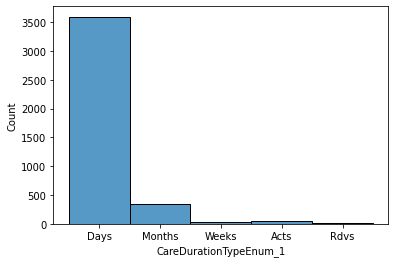

In [41]:
sns.histplot(df_extract['CareDurationTypeEnum_1']);

# Phase de test

In [103]:
doc = nlp("prise de sang tous les 15 jours pour 2 ans")
spacy.displacy.render(doc, style="ent",jupyter=True)

In [43]:
import re

In [137]:
test = "prise de sang tous les 15 jours pendant 5 jours"

In [138]:
x = re.search('((?<=pour\s)|(?<=pendant\s))\d\sjours', test)

In [139]:
print(x.group().split())

['5', 'jours']


In [93]:
len(df_extract[df_extract['CareDuration_1']>1])

931

In [106]:
x.__dict__

AttributeError: 're.Match' object has no attribute '__dict__'